In [ ]:
from pathlib import Path
import datetime as dt
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
resolution = 4         # 4 or 12 km
datadir = Path(f"/import/beegfs/CMIP6/wrf_era5/{str(resolution).zfill(2)}km/")
filepattern = f"era5_wrf_dscale_{resolution}km"
chunking = {
    4: [225, 210],
    12: ['auto', 'auto']
}

### load and transform ACIS data

In [ ]:
rainDF = pd.read_csv('FAI_PAFA_hourly_precip_NCEI.csv')
rainDF['datetime'] = pd.to_datetime(rainDF.DATE)
rainDF['HPCP'] = rainDF.HPCP.replace(999.99, 0).replace(0.01, 0) * 25.4
rainDF

,STATION,STATION_NAME,DATE,HPCP,datetime
0,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 01:00,0.000,1950-01-01 01:00:00
1,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 11:00,0.762,1950-01-01 11:00:00
2,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 12:00,0.508,1950-01-01 12:00:00
3,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 13:00,0.508,1950-01-01 13:00:00
4,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 14:00,0.762,1950-01-01 14:00:00
...,...,...,...,...,...
42191,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131001 13:00,0.000,2013-10-01 13:00:00
42192,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131101 01:00,0.000,2013-11-01 01:00:00
42193,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131201 00:00,0.000,2013-12-01 00:00:00
42194,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131201 01:00,0.000,2013-12-01 01:00:00


In [ ]:
dt.datetime.strptime(startdate, '%Y-%m-%d')

datetime.datetime(1967, 7, 1, 0, 0)

In [ ]:
mask = ((rainDF['datetime'] > dt.datetime.strptime(startdate, '%Y-%m-%d')) & 
        (rainDF['datetime'] <= dt.datetime.strptime(enddate, '%Y-%m-%d')))

In [ ]:
bothDF = rainDF.loc[mask].drop(columns=['STATION', 'STATION_NAME', 'DATE']).set_index('datetime').merge(all_rain, how='left', left_index=True, right_index=True)
bothDF.columns = ['COOP:502968', 'ERA5 4 km']

Text(0, 0.5, 'mm')

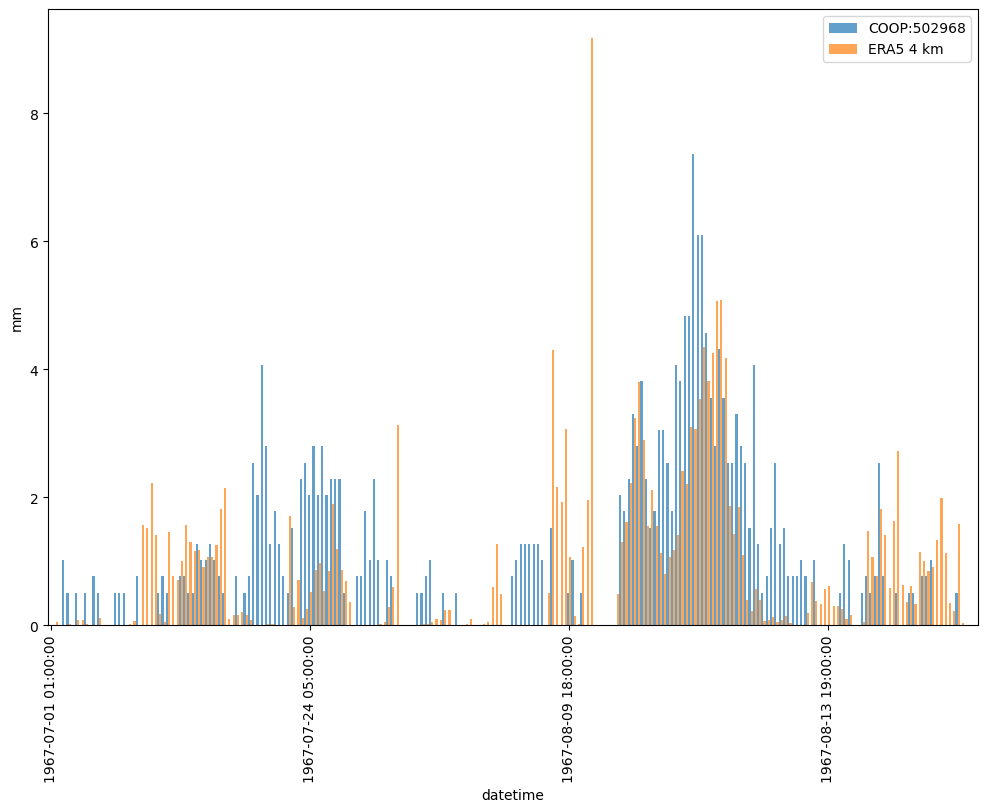

In [ ]:
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(12, 8))
bothDF.plot(kind='bar', alpha=0.7, width=1, ax=ax)
ax.xaxis.get_major_locator()                    # <matplotlib.ticker.FixedLocator at 0x2221f657340>
ax.xaxis.get_major_formatter()                  # <matplotlib.ticker.FuncFormatter at 0x2221f8e2a00>

ax.xaxis.set_major_locator(MultipleLocator(60))  # show every 5th tick
plt.ylabel('mm')

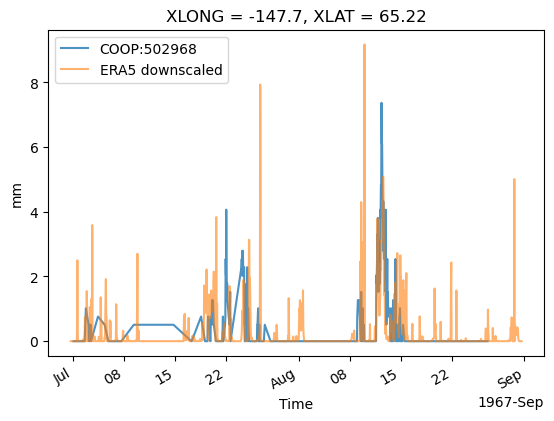

In [ ]:
ax = (rainDF.loc[mask].set_index('datetime').HPCP).plot(label='COOP:502968', alpha=0.8)
xr.concat(concat, dim='Time').plot(ax=ax, alpha=0.6, label='ERA5 downscaled')
plt.ylabel('mm')
plt.legend()